In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets
from scipy.spatial.distance import cdist
from collections import Counter
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import decomposition
from sklearn.cluster import KMeans
import random as rd

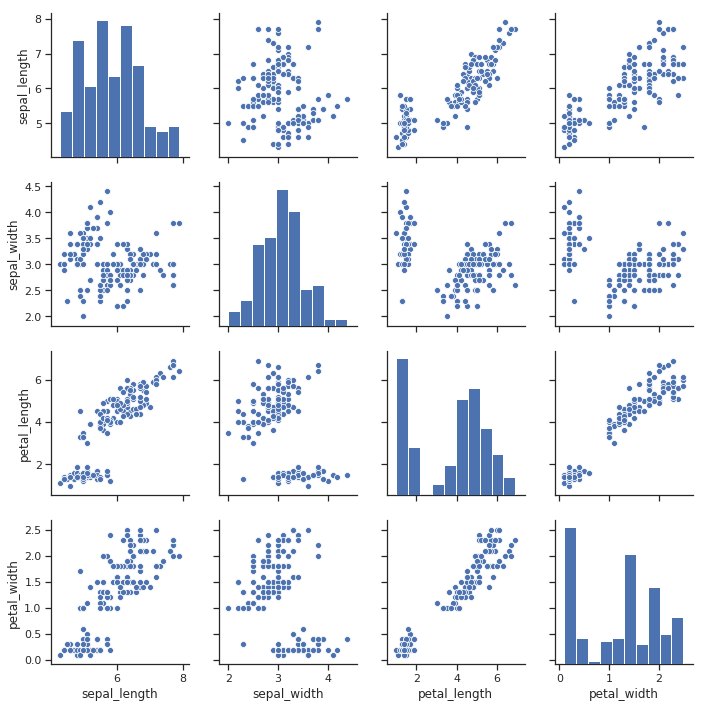

In [5]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

iris = sns.load_dataset("iris")

g = sns.pairplot(iris)

In [10]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

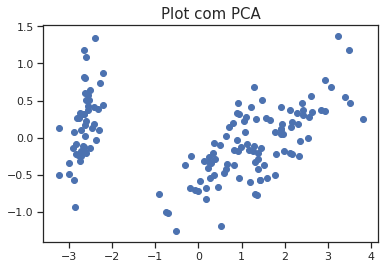

In [35]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("Plot com PCA", fontsize = 15)
plt.show()

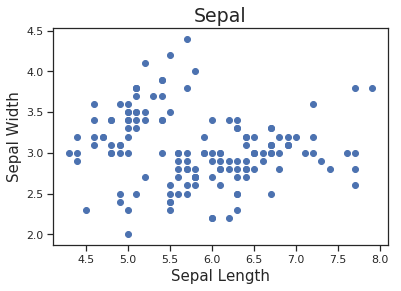

In [27]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Sepal Length', fontsize=15)
plt.ylabel('Sepal Width', fontsize=15)
plt.title('Sepal',fontsize = 19)
plt.show()

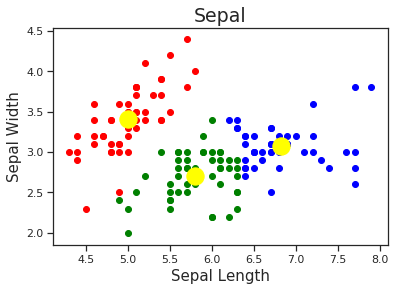

In [93]:
X = iris.data[:,[0,1]]
m=X.shape[0] 
n=X.shape[1]

n_inter = 100
K = 3
Centroids=np.array([]).reshape(n,0) 

for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]
#print(Centroids)

Output={}

for i in range(n_inter):
    #step 2.a
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)+1
    #step 2.b
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]] 
    for k in range(K):
        Y[k+1]=Y[k+1].T
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y

color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Sepal Length', fontsize=15)
plt.ylabel('Sepal Width', fontsize=15)
plt.title('Sepal',fontsize = 19)
plt.show()

A partir daqui usamos a biblioteca sklearn para comparação:

In [31]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)
centers = km.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


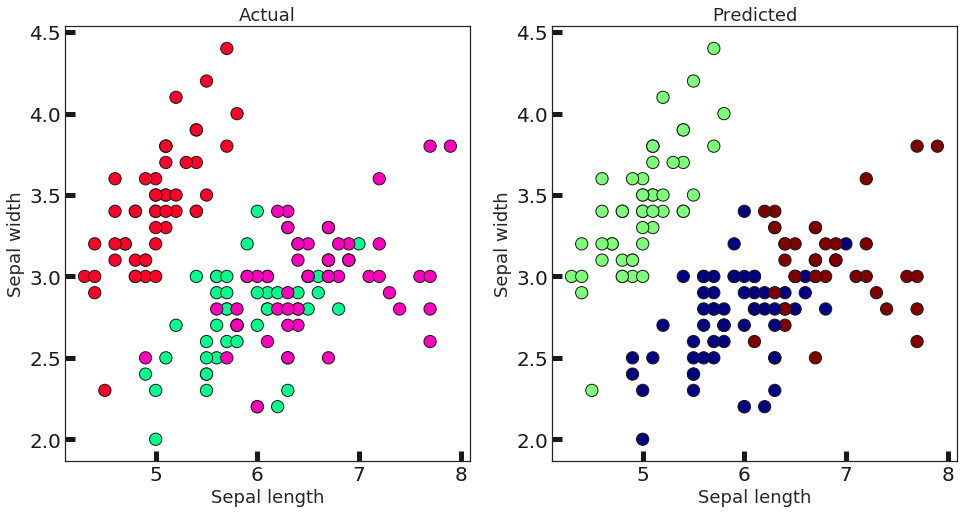

In [33]:
new_labels = km.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',edgecolor='k', s=150)

axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)

axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

plt.show()